# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [130]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [173]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

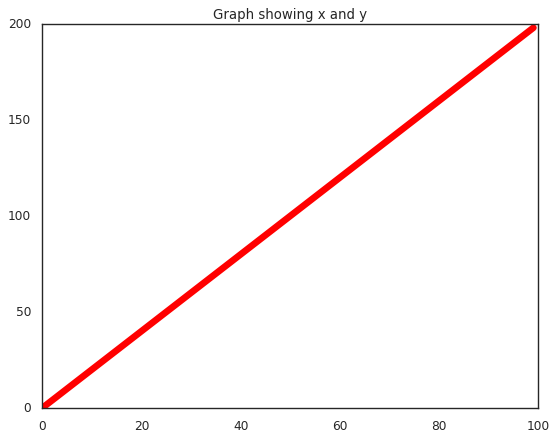

In [174]:
# Method 1
plt.plot(x, y, color='red', linewidth=6)
plt.title('Graph showing x and y')
plt.show()

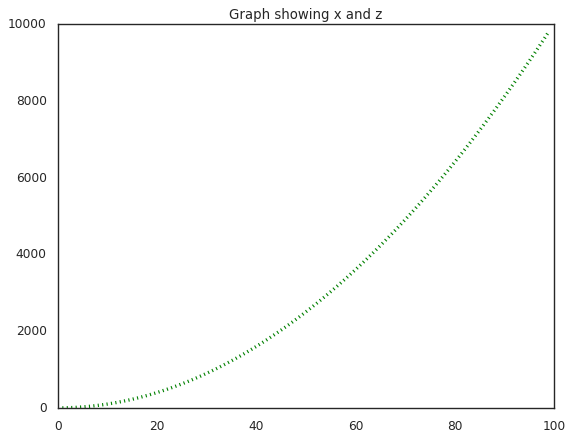

In [175]:
# Method 1
plt.plot(x, z, color='green', linewidth=3, linestyle=':')
plt.title('Graph showing x and z')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

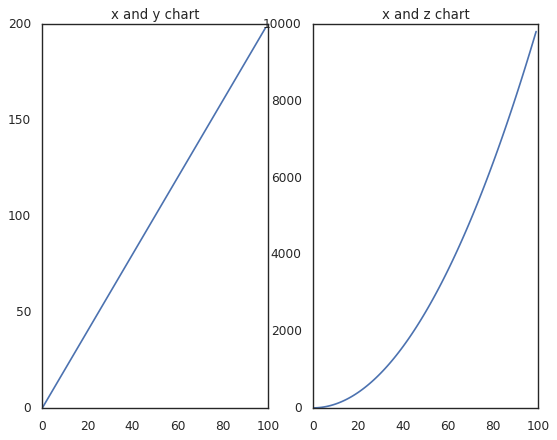

In [176]:
fig, axes = plt.subplots(ncols=2, nrows=1)
axes[0].plot(x,y)
axes[0].set_title('x and y chart')
axes[1].plot(x,z)
axes[1].set_title('x and z chart')
plt.show();

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

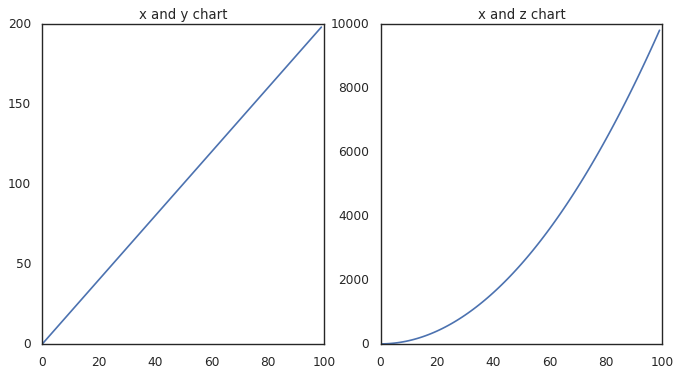

In [182]:
# your code here

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
axes[0].plot(x,y)
axes[0].set_title('x and y chart')
axes[1].plot(x,z)
axes[1].set_title('x and z chart')
plt.show();

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [183]:
# your code here
import math
x = np.arange(0,100)
y = x**2
z = math.e**x

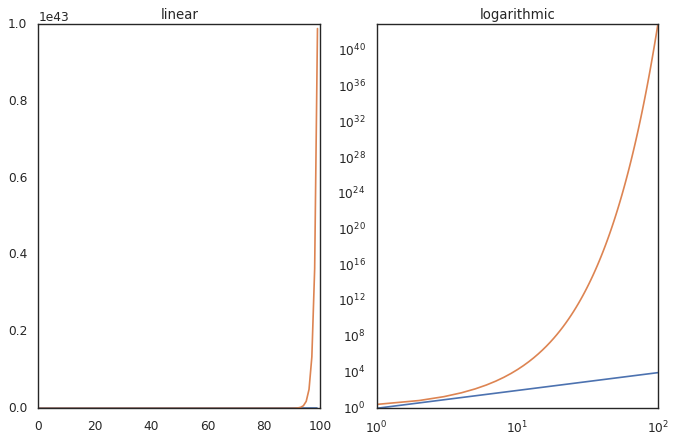

In [186]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
#plot1
axes[0].plot(x,y)
axes[0].plot(x,z)
axes[0].set_title('linear')
axes[0].set_xscale("linear")
axes[0].set_yscale("linear")
#plot2
axes[1].plot(x,y)
axes[1].plot(x,z)
axes[1].set_title('logarithmic')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
plt.show();

#### As a bonus challenge, try to add a legend to the plot.

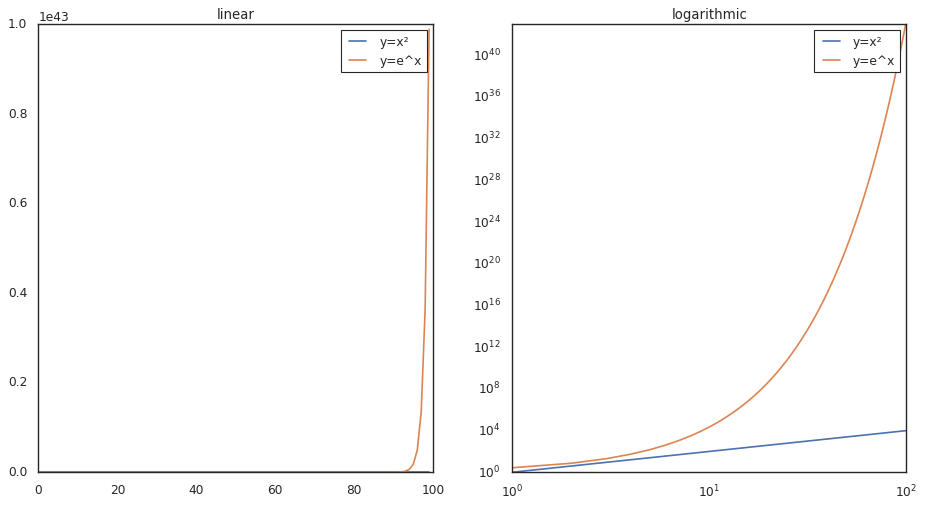

In [187]:
# your code here
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 7))
#plot1
axes[0].plot(x,y,label="y=x²")
axes[0].plot(x,z,label="y=e^x")
axes[0].set_title('linear')
axes[0].set_xscale("linear")
axes[0].set_yscale("linear")
axes[0].legend()
#plot2
axes[1].plot(x,y,label="y=x²")
axes[1].plot(x,z,label="y=e^x")
axes[1].set_title('logarithmic')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].legend()
plt.show();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
fitbit = pd.read_csv('/home/sandra/Downloads/fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [10]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [36]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

fitbit_month_select = fitbit[['Months_encoded', 'Steps']]
fitbit_month_select.head()

,Months_encoded,Steps
0,5,905
1,5,18925
2,5,14228
3,5,6756
4,5,502


In [37]:
monthly_median = fitbit.groupby('Months_encoded')['Steps'].median().to_frame().reset_index()
monthly_median

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0
5,6,12935.5
6,7,10644.0
7,8,12213.0
8,9,9343.0
9,10,7865.0


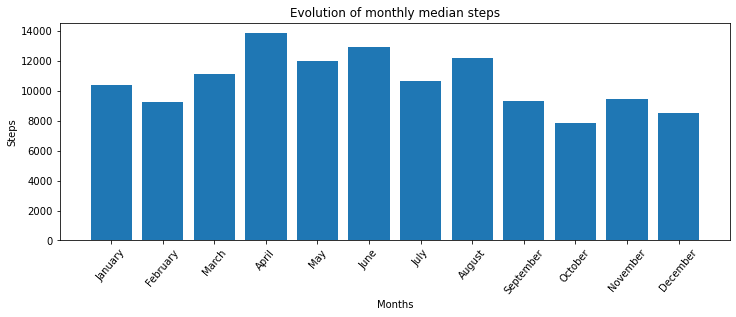

<Figure size 864x288 with 0 Axes>

In [112]:
monthly_median_steps = fitbit[['Months_encoded','Months','Steps']].groupby('Months').median().reset_index().sort_values(by=['Months_encoded'])

steps = monthly_median_steps['Steps']
months = monthly_median_steps['Months']
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
axes.bar(months,steps)
plt.title('Evolution of monthly median steps')
labels = axes.get_xticklabels()
plt.xlabel('Months')
plt.ylabel('Steps')
plt.setp(labels, rotation='50')
plt.show();

plt.savefig('./figures/monthly_median_steps.png',
            orientation='landscape',
            transparent=False)

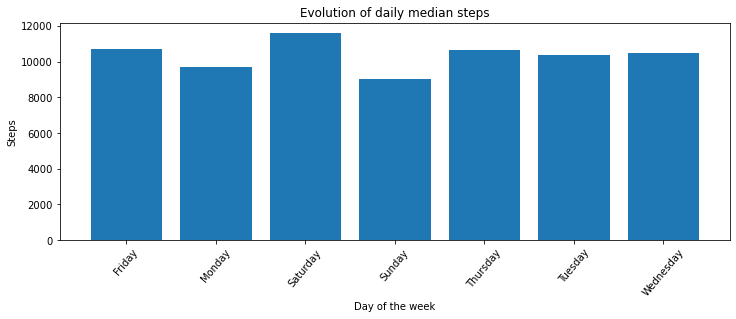

<Figure size 864x288 with 0 Axes>

In [116]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

day_median = fitbit[['Days','Steps']].groupby('Days').median().reset_index().sort_values(by=['Days'])

steps = day_median['Steps']
months = day_median['Days']
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
axes.bar(months,steps)
plt.title('Evolution of daily median steps')
labels = axes.get_xticklabels()
plt.xlabel('Day of the week')
plt.ylabel('Steps')
plt.setp(labels, rotation='50')
plt.show();

plt.savefig('./figures/median_steps_per_day.png',
            orientation='landscape',
            transparent=False)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

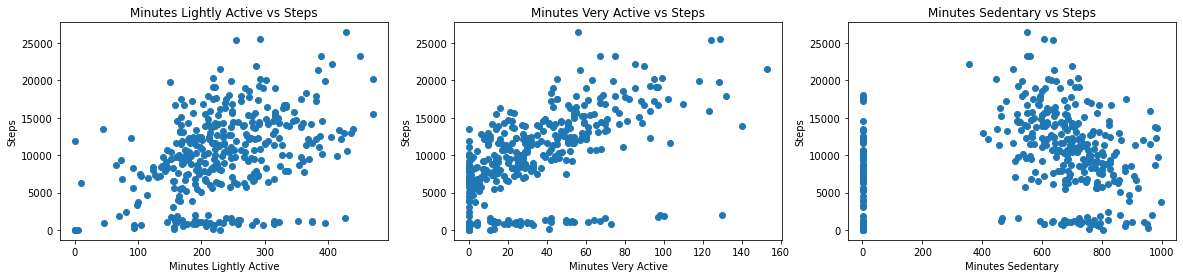

In [118]:
# your code here

mla_steps = fitbit[['Minutes Lightly Active','Steps']]
mva_steps = fitbit[['Minutes Very Active','Steps']]
ms_steps = fitbit[['Minutes Sedentary','Steps']]

plot_loop = [mla_steps, mva_steps, ms_steps]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 4))
for y, x in enumerate(plot_loop): 
    axes[y].scatter(x.iloc[:,0],x.iloc[:,1])
    axes[y].set_title(x.columns[0]+' vs '+x.columns[1])
    axes[y].set_xlabel(x.columns[0])
    axes[y].set_ylabel(x.columns[1])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [14]:
# your code here
titanic = pd.read_csv('/home/sandra/Downloads/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [16]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [119]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [120]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [121]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

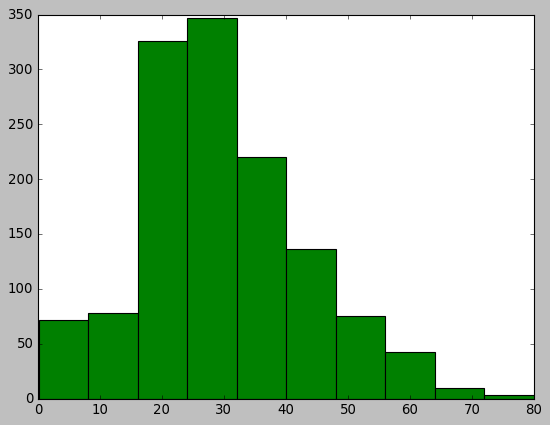

In [124]:
# your code here
age = titanic['Age']
plt.hist(age, bins=10, color='green')
plt.show();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

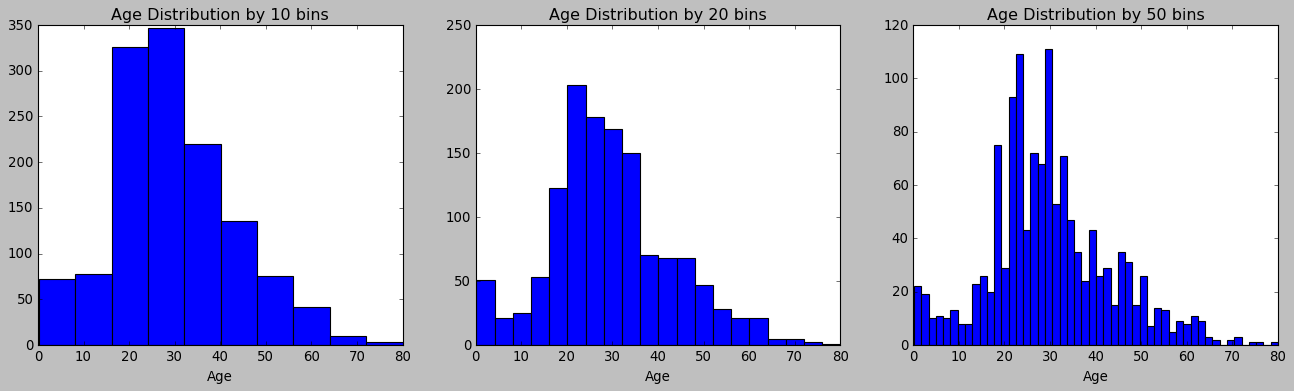

In [127]:
# your code here

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 5))
axes[0].hist(titanic['Age'],bins=10)
axes[0].set(title = 'Age Distribution by 10 bins', xlabel = 'Age',)
axes[1].hist(titanic['Age'],bins=20)
axes[1].set(title = 'Age Distribution by 20 bins', xlabel = 'Age' )
axes[2].hist(titanic['Age'],bins=50)
axes[2].set(title = 'Age Distribution by 50 bins', xlabel = 'Age' )
plt.show()

#### How does the bin size affect your plot?

In [128]:
"""It definitely affects on how data is displayed, by making it a bit more difficult on a first sight to identify where are the most and least distributions, however, it's very useful as you can actually spot the distribution on a very detailed manner."""

"It definitely affects on how data is displayed, by making it a bit more difficult on a first sight to identify where are the most and least distributions, however, it's very useful as you can actually spot the distribution on a very detailed manner."

#### Use seaborn to show the distribution of column `Age`.

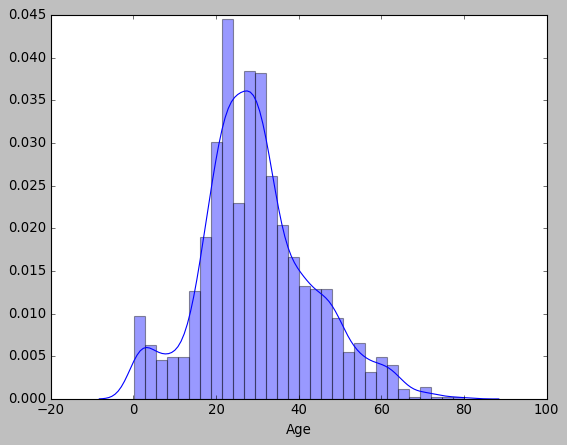

In [132]:
# your code here
sns.distplot(age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

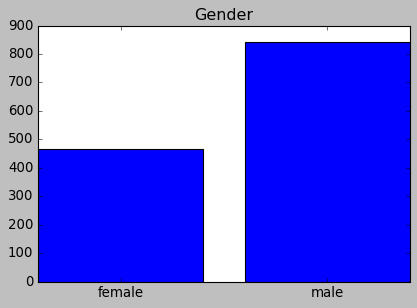

In [136]:
# Method 1 - matplotlib
# your code here
gender_df = pd.DataFrame(titanic.groupby('Gender').size().reset_index())

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(6, 4))
axes.set_title('Gender')
axes.bar(gender_df['Gender'],gender_df[0])
labels = axes.get_xticklabels()
plt.show()

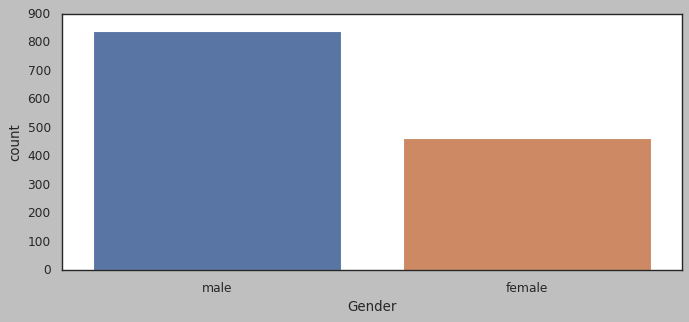

In [137]:
# Method 2 - seaborn
# your code here
fig = plt.figure(figsize=(10,4))
sns.set(style="white")
ax = sns.countplot(titanic['Gender'])

#### Use the right plot to visualize the column `Pclass`.

In [140]:
# your code here
titanic['Pclass']

0       3
1       1
2       3
3       1
4       3
       ..
1304    3
1305    1
1306    3
1307    3
1308    3
Name: Pclass, Length: 1309, dtype: int64

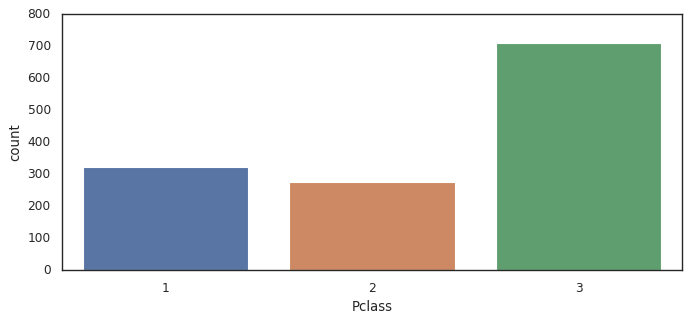

In [141]:
fig = plt.figure(figsize=(10, 4))
sns.set_style()
ax = sns.countplot(x=titanic['Pclass'], data=titanic);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

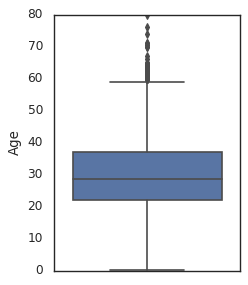

In [147]:
# your code here
fig = plt.figure(figsize=(3, 4))
sns.set_style()
ax = sns.boxplot(y='Age', data=titanic);

#### What does the last plot tell you about the feature `Age`?

In [149]:
"""
I think one of the best ways to actually see the distribution of the Age is to use this box plot as you can spot very quickly the actual distribution of the dataframe age.
In this example, we can see that the median is in about 29 yo whereas the majority of the distribution lies between 23 and 39 years old."""

'\nI think one of the best ways to actually see the distribution of the Age is to use this box plot as you can spot very quickly the actual distribution of the dataframe age.\nIn this example, we can see that the median is in about 29 yo whereas the majority of the distribution lies between 23 and 39 years old.'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

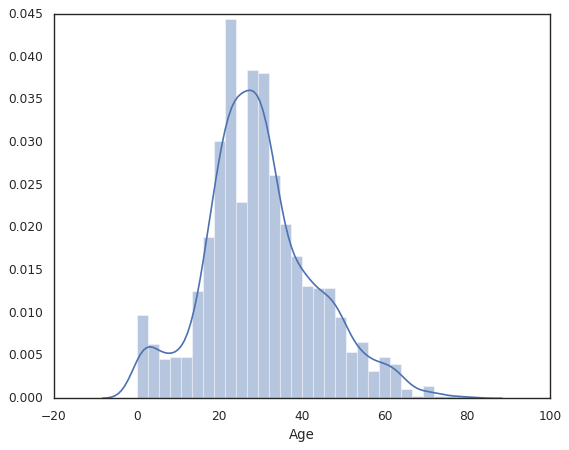

In [150]:
# your code here
sns.distplot(titanic["Age"])

#### What additional information does the last plot provide about feature `Age`?

In [152]:
"""
This type of graph shows us with a deeper detail the distribution of age within the Titanic dataframe"""

'\nThis type of graph shows us with a deeper detail the distribution of age within the Titanic dataframe'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Age')

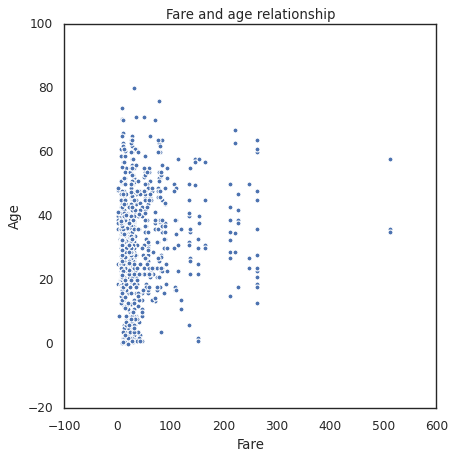

In [155]:
# Method 1 - matplotlib
# your code here
fig = plt.figure(figsize=(6, 6))
plt.scatter(titanic['Fare'], titanic['Age'])
plt.title('Fare and age relationship')
plt.xlabel('Fare')
plt.ylabel('Age')

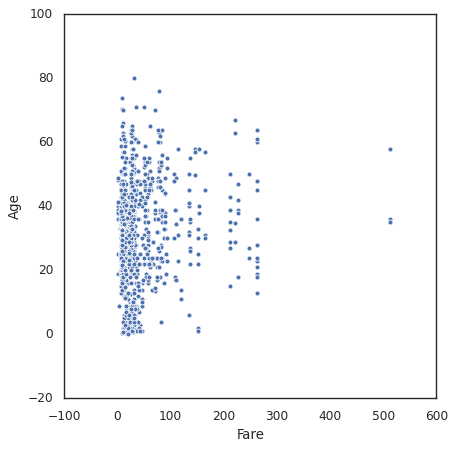

In [156]:
# Method 2 - seaborn
# your code here
fig = plt.figure(figsize=(6, 6))
sns.scatterplot(x='Fare', y='Age', data=titanic)

#### Plot the correlation matrix using seaborn.

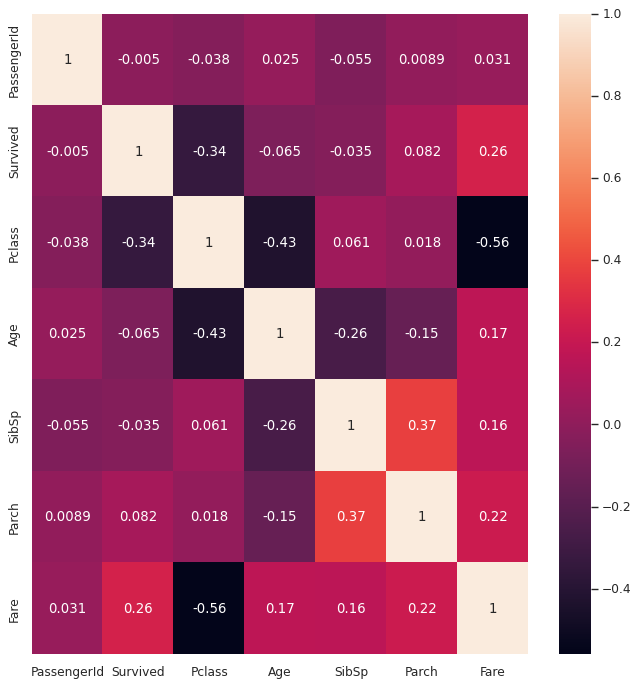

In [168]:
# your code here
fig = plt.figure(figsize=(10, 10))
corr = titanic.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

#### What are the most correlated features?

In [169]:
"""
The most correlated figures are Fare-PClass followed by Age and PClass
"""

'\nThe most correlated figures are Fare-PClass followed by Age and PClass\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

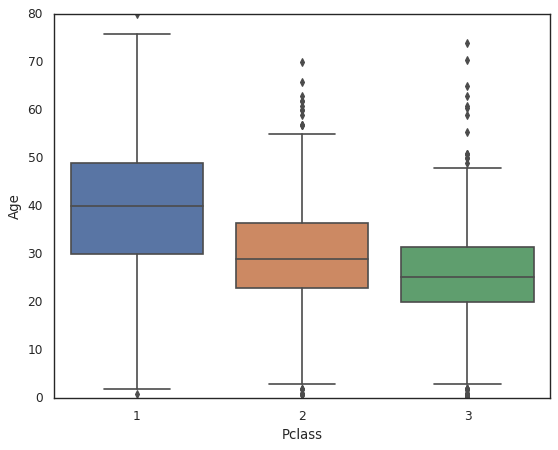

In [166]:
# your code here
sns.boxplot(data=titanic, x='Pclass', y='Age')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

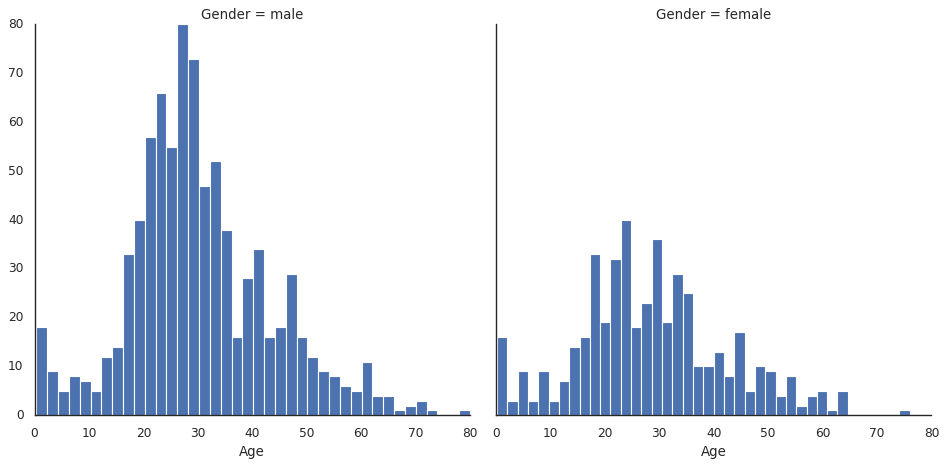

In [171]:
# your code here
fig = sns.FacetGrid(data=titanic, col='Gender', height=6)
fig.map(plt.hist, 'Age', bins=40)
plt.show()